[0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]
The means per bin are:  [ 43.3257  67.357   94.0708 117.1188 131.2279 131.2212 117.356   94.0054
  67.2345  43.0937]


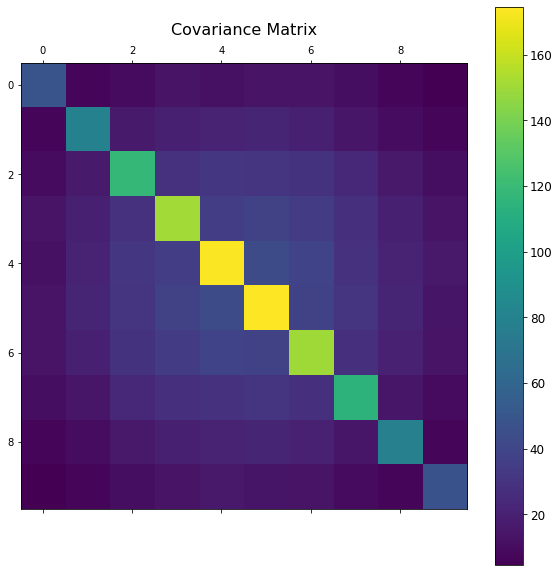

In [102]:
import numpy as np
import math
from scipy import signal
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.stats import norm

#Define the number of bins
numBins = 10
numEvents = 1000

#Define the expectation in each bin
binCentres = np.arange(0.5,numBins+0.5,1)
print(binCentres)
mu = numEvents*norm.pdf(binCentres,numBins/2,3)
#mu = [100]*numBins


#Define the number of MC universes
numUniv = 10000

#Will be used to calculate the covariance
sumxy = np.zeros((numBins,numBins))
sumx = np.zeros((numBins))


#Loop over number of universes
for _ in range(numUniv):
    x= [0]*numBins
    
    normUncert=np.random.normal(1,0.05)
    
    #Loop over all bins to get random data 
    for i in range(numBins):
        x[i]=np.random.poisson(mu[i]*normUncert)
        #x[i]=np.random.poisson(mu[i])
        
    #Loop over all bins to calculate sums
    for i in range(numBins):
        sumx[i]+=x[i]
        
        #Loop over diagonal and off diagonal bins
        for j in range(i,numBins):
            sumxy[i][j]+=x[i]*x[j]

#Scale by number of universes to get real means           
mux = sumx/float(numUniv)            
covxy=sumxy/float(numUniv)
print("The means per bin are: ",mux)

#Fill in other half of the matrix by symmetry
for i in range(numBins):
    for j in range(i,numBins):
        if(i == j):
            continue
        covxy[j][i]=covxy[i][j]


#Calculate the covariances by subtracting the means
for i in range(numBins):
    for j in range(numBins):
        covxy[i][j]-=mux[i]*mux[j]
      
#print("The covariance matrix is:\n",covxy)

f = plt.figure(figsize=(10, 10))
plt.matshow(covxy,fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Covariance Matrix', fontsize=16);


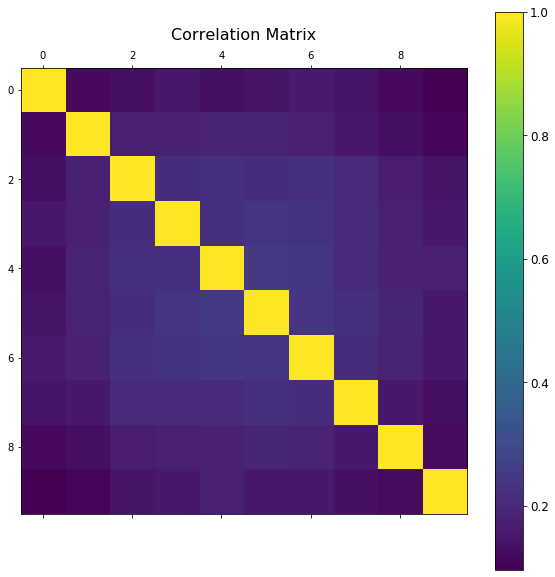

In [103]:
corxy=np.copy(covxy)
for i in range(numBins):
    for j in range(numBins):
        corxy[i][j]/=math.sqrt(covxy[i][i]*covxy[j][j])
#print("The correlation matrix is:\n",corxy)

f = plt.figure(figsize=(10, 10))
plt.matshow(corxy,fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix', fontsize=16);

The covariance and correlation matrices are very closely related mathematical quantities. First lets define some terminology. $x$ and $y$ are variables. The 
